In [1]:
### glider erddap data loader

In [19]:
from . import GliderDataLoader
import cmocean
import numpy as np

In [20]:
sg401=GliderDataLoader.erddap_glider('sg401')
sg401.list_data(verbose=True)

0     sg401_2019_aanderaa
1      sg401_2019_wetlabs
2      sg401_EcoFOCI_2019
3    sg401_b9ae_ed68_1861
Name: Dataset ID, dtype: object


In [21]:
variables = {'sg401_EcoFOCI_2019':['profileid',
                     'latitude', 
                     'ctd_depth', 
                     'longitude', 
                     'salinity',
                     'density', 
                     'time', 
                     'temperature'],
                     'sg401_2019_wetlabs':['time',
                     'wlbb2fl_sig695nm_adjusted',
                     'wlbb2fl_sig470nm_adjusted', 
                     'wlbb2fl_sig700nm_adjusted', 
                     'wlbb2fl_temp',
                     'profileid_wetlabs'],
                     'sg401_2019_aanderaa':['time',
                     'aanderaa4330_dissolved_oxygen',
                     'aa4330_airsat',
                     'aa4330_temp']}
sg401.constrain_data(variables=variables)
dfs = sg401.load_data()

sg401_2019_aanderaa
sg401_2019_wetlabs
sg401_EcoFOCI_2019


(<Figure size 1224x144 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118012f60>)

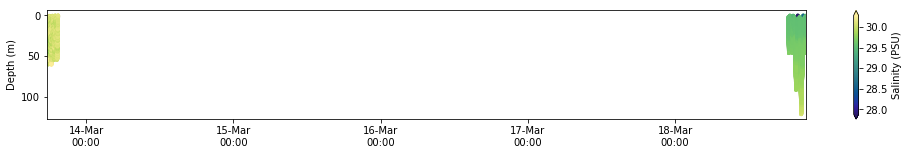

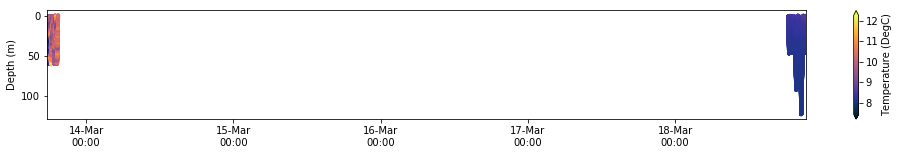

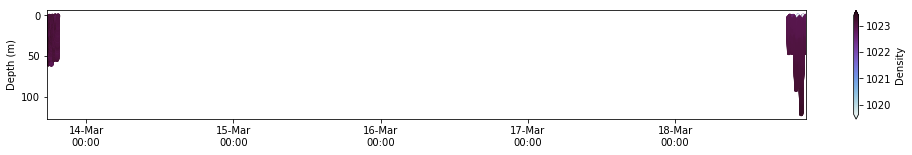

In [22]:
sg401.plot_timeseries(dfs['sg401_EcoFOCI_2019'].sort_index(), 'salinity (PSU)','Salinity (PSU)',cmocean.cm.haline)

sg401.plot_timeseries(dfs['sg401_EcoFOCI_2019'].sort_index(), 'temperature (degrees_Celsius)','Temperature (DegC)')

sg401.plot_timeseries(dfs['sg401_EcoFOCI_2019'].sort_index(), 'density (g/m^3)','Density',cmocean.cm.dense)

In [23]:
### depth needs to be downsampled to the other database freqencyies to plot chlor/oxy

dfwet = dfs['sg401_2019_wetlabs'].join(dfs['sg401_EcoFOCI_2019'])
dfaan = dfs['sg401_2019_aanderaa'].join(dfs['sg401_EcoFOCI_2019'])

#quick QC
dfaan.aa4330_airsat[dfaan.aa4330_airsat < 0] =np.nan


{'sg401_Puget_Sound_timeseries': DatetimeIndex(['2019-03-18 18:28:39+00:00', '2019-03-18 18:28:40+00:00',
               '2019-03-18 18:28:41+00:00', '2019-03-18 18:28:42+00:00',
               '2019-03-18 18:28:43+00:00', '2019-03-18 18:28:44+00:00',
               '2019-03-18 18:28:45+00:00', '2019-03-18 18:28:46+00:00',
               '2019-03-18 18:28:47+00:00', '2019-03-18 18:28:48+00:00',
               ...
               '2019-03-13 19:25:09+00:00', '2019-03-13 19:25:10+00:00',
               '2019-03-13 19:25:11+00:00', '2019-03-13 19:25:12+00:00',
               '2019-03-13 19:25:13+00:00', '2019-03-13 19:25:14+00:00',
               '2019-03-13 19:25:15+00:00', '2019-03-13 19:25:16+00:00',
               '2019-03-13 19:25:17+00:00', '2019-03-13 19:25:18+00:00'],
              dtype='datetime64[ns, UTC]', name='time (UTC)', length=11494, freq=None)}
{'sg401_Puget_Sound_timeseries': DatetimeIndex(['2019-03-18 18:28:39+00:00', '2019-03-18 18:28:40+00:00',
               '2019-03

(<Figure size 576x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x103008be0>)

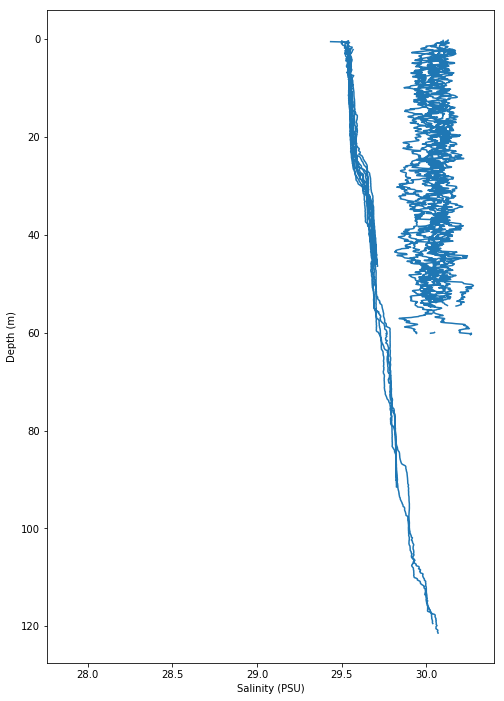

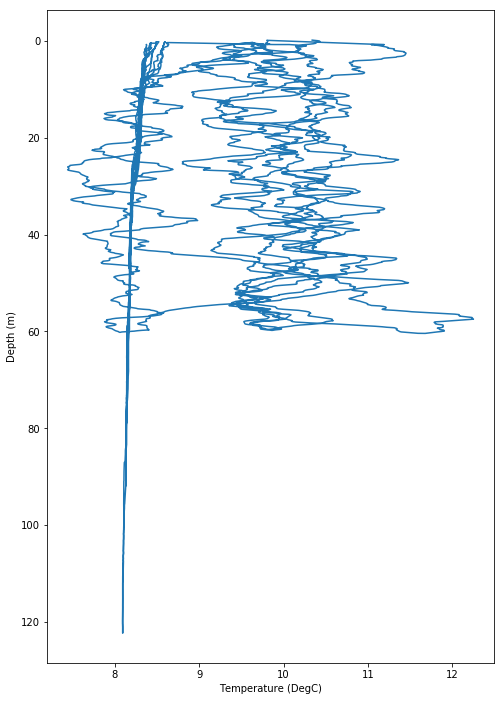

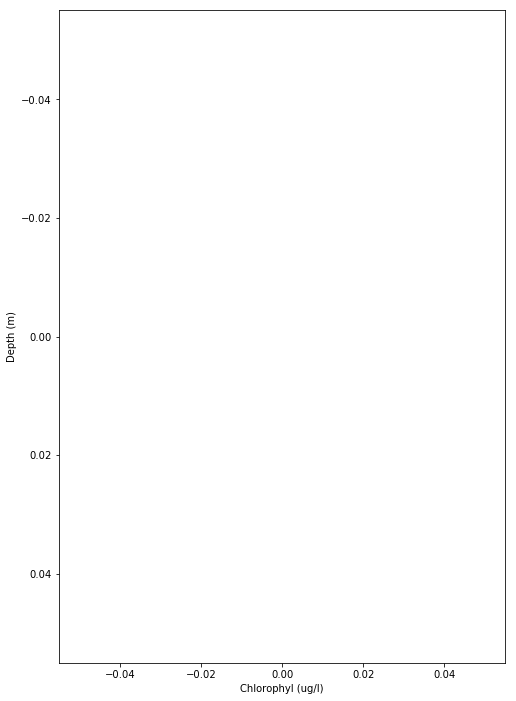

In [24]:
dfg = dfs['sg401_EcoFOCI_2019'].groupby('profileid')
dfwg = dfwet.groupby('profileid')

sg401.plot_waterfall(dfg, 'salinity (PSU)','Salinity (PSU)',.25)
sg401.plot_waterfall(dfg, 'temperature (degrees_Celsius)','Temperature (DegC)',.125)
sg401.plot_waterfall(dfwg, 'wlbb2fl_sig695nm_adjusted','Chlorophyl (ug/l)',.25)